<a href="https://colab.research.google.com/github/DrSubbiah/1.Bayesian-Inference/blob/master/17.0_PredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center><font color="darkblue">  Predictive Distribution</center>

Bayesian model allows to obtain distribution about unseen data in the light of information contained in the posterior of the parameter $\theta$ exist in the original likelihood


## <font color="darkred"> Predictive information about "New Data"

- Observe a data $X$ parameterised by $\theta$

- Construct prior for $\theta$

- Obtain posterior $\theta|X$

- **Interested to know the probability distribution about "unseen data $Y$"**

<font color="red">**Through Posteriors**

$$ p(Y|X)=\int_{\theta}p(y|\theta)\pi(\theta|x)~d\theta$$

  - $p$ refers to the pdf of $Y$ parameterised by $\theta$ (same as $X$)

  - $\pi$ refers to Posterior of $\theta$

## <font color="darkviolet"> For Binomial Case

1. Originally the data was a Binomial with $x$ and $n$

1. The Prior was Beta with parameters $a$ and $b$

Hence Posterior predictive for an unseen environment is out of a new trial, say $m$ number times, what is the distribution of number of successes $y$

So again the likelihood $\mathcal{L}[\theta|Y]$ or PMF $f(Y|\theta)$ is from

$$Y|\theta = \mathrm{Binomial}(m, \theta)$$

## <font color="red"> But information for $\theta$ is no longer from prior but from the posterior

$$p(Y|X)=\int_0^1{m \choose y} \theta^y (1-\theta)^{m-y} \frac{1}{\beta(a_1,a_2)}\theta^{a_1-1} (1-\theta)^{a_2-1} ~d\theta$$

where $a_1=x+a$ and $a_2=n-x+b$


$$\implies p(Y=y|x=x)=\frac{{m \choose y}}{\beta(a_1,a_2)}\beta(y+a_1, m-y+a_2)$$

where the range for $m$ is $y=0,1,2,\cdots\cdots,m$

## <font color="maroon">**This is called Beta-Binomial Distribution**

(*for more details please refer from earlier discussion, handout Bayesian Components II*)

#<center><font color="darkblue">  Predictive Distribution - Computation - STAN</center>

In STAN, *generated quantities* block can be used to implement the scheme to generate from posterior predictive distibution


## <font color="darkred"> Predictive information about "New Data"

- Observe a data $X$ parameterised by $\theta$

- Construct prior for $\theta$

- Obtain posterior $\theta|X$

- **Interested to know the probability distribution about "unseen data $Y$"**

<font color="red">**Through Posteriors**

$$ p(Y|X)=\int_{\theta}p(y|\theta)\pi(\theta|x)~d\theta$$

  - $p$ refers to the pdf of $Y$ parameterised by $\theta$ (same as $X$)

  - $\pi$ refers to Posterior of $\theta$

## <font color="darkviolet"> For Binomial Case

1. Originally the data was a Binomial with $x$ and $n$

1. The Prior was Beta with parameters $a$ and $b$

Hence Posterior predictive for an unseen environment is out of a new trial, say $m$ number times, what is the distribution of number of successes $y$

So again the likelihood $\mathcal{L}[\theta|Y]$ or PMF $f(Y|\theta)$ is from

$$Y|\theta = \mathrm{Binomial}(m, \theta)$$

## <font color="red"> But information for $\theta$ is no longer from prior but from the posterior

$$p(Y|X)=\int_0^1{m \choose y} \theta^y (1-\theta)^{m-y} \frac{1}{\beta(a_1,a_2)}\theta^{a_1-1} (1-\theta)^{a_2-1} ~d\theta$$

where $a_1=x+a$ and $a_2=n-x+b$


$$\implies p(Y=y|x=x)=\frac{{m \choose y}}{\beta(a_1,a_2)}\beta(y+a_1, m-y+a_2)$$

where the range for $m$ is $y=0,1,2,\cdots\cdots,m$

## <font color="maroon">**This is called Beta-Binomial Distribution**

(*for more details please refer from earlier discussion, handout Bayesian Components II*)

In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
import scipy
import pystan

In [ ]:
#For plots
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
generated quantities {
  vector[N_test] y_test;
  for(i in 1:N_test) {
    y_test[i] = inv_logit(alpha + x_test[i]*beta);//bernoulli_rng(inv_logit(alpha + x_test[i]*beta))
  }

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data Sets/Heart_data.csv"
hrt_da = pd.read_csv(path)

In [ ]:
hrt_da

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Yes
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Yes
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Yes
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Yes
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Yes
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


In [ ]:
hrt_da['ageC'] = np.where(hrt_da['age']>= 40, 1, 0)
hrt_da.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,ageC
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Yes,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Yes,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,1
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Yes,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Yes,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No,1
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Yes,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Yes,1


In [ ]:
hrt_da=hrt_da.assign(chd_c=lambda x:x['chd'].apply(lambda y: 1 if y=="Yes" else 0))

In [ ]:
BinoBeta_PPD_code = """
data {
    real<lower=0> a;
    real<lower=0> b;
    int<lower=0> n;
    int<lower=0> y;
    int<lower=0> m;
}

parameters {
    real<lower=0, upper=1> p;
}

model {
      y ~ binomial(n, p);
      p ~ beta(a, b);
}
generated quantities {
  int<lower=0,upper=m> PosPred;

  PosPred= binomial_rng(m,p);

}
  """

# posterior
posterior_BinoBeta_PPD = pystan.StanModel(model_code=BinoBeta_PPD_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9418f08d545daa0b2d7e7496f7939fed NOW.


In [ ]:
BinoBeta_PPD_data = {
             'n': len(hrt_da),
             'y': len(hrt_da.loc[hrt_da['chd'] == 'Yes']),
             'a':1,
             'b':1,
             'm':10
            }
print(BinoBeta_PPD_data)

{'n': 462, 'y': 160, 'a': 1, 'b': 1, 'm': 10}


In [ ]:
BinoBeta_PPD_fit= posterior_BinoBeta_PPD.sampling(data=BinoBeta_PPD_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
BinoBeta_PPD_summ=az.summary(BinoBeta_PPD_fit,round_to=3,hdi_prob=0.95)
BinoBeta_PPD_summ

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.347,0.022,0.302,0.389,0.000,0.000,6725.492,6287.049,1.001
PosPred,3.464,1.525,1.000,6.000,0.009,0.007,26809.175,27202.683,1.000


In [ ]:
pos_data=np.array(BinoBeta_PPD_op.posterior['PosPred'])
pos_data=pd.DataFrame(pos_data)
pos_data=pos_data.astype('int64')

In [ ]:
pos_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,4,8,7,5,4,2,5,2,2,3,5,1,6,3,6,2,2,5,3,3,1,4,6,5,1,3,0,4,1,1,5,1,2,3,2,3,2,3,5,4,...,5,4,2,3,1,3,4,5,3,1,3,4,4,3,4,5,7,3,1,1,4,4,2,1,6,4,2,4,6,4,3,4,6,2,5,4,3,5,6,5
1,3,4,3,3,2,4,5,3,3,2,3,2,5,6,5,2,4,4,2,4,3,5,2,2,2,5,4,1,3,3,4,6,3,2,3,2,3,4,3,4,...,4,4,3,5,3,4,4,3,3,4,4,2,2,2,4,3,3,4,7,2,2,2,2,5,2,6,5,5,4,6,3,4,3,6,3,4,3,6,5,4
2,7,4,4,2,2,5,3,6,4,3,3,4,1,4,4,2,5,6,2,4,5,4,5,4,5,6,3,5,2,5,4,4,0,5,6,5,6,3,6,5,...,3,5,3,3,3,3,4,4,6,4,3,2,2,3,4,3,3,2,2,4,1,4,4,4,2,2,2,3,0,4,6,5,2,2,3,2,3,3,3,3
3,1,5,4,5,5,6,1,2,2,2,5,4,8,3,1,3,7,1,4,4,4,4,1,5,1,2,3,3,5,4,2,3,2,3,4,3,5,3,2,4,...,2,7,3,5,2,0,2,3,2,3,8,6,5,0,2,0,3,3,4,5,1,1,7,4,1,5,5,2,3,4,5,2,3,4,4,3,5,4,0,3


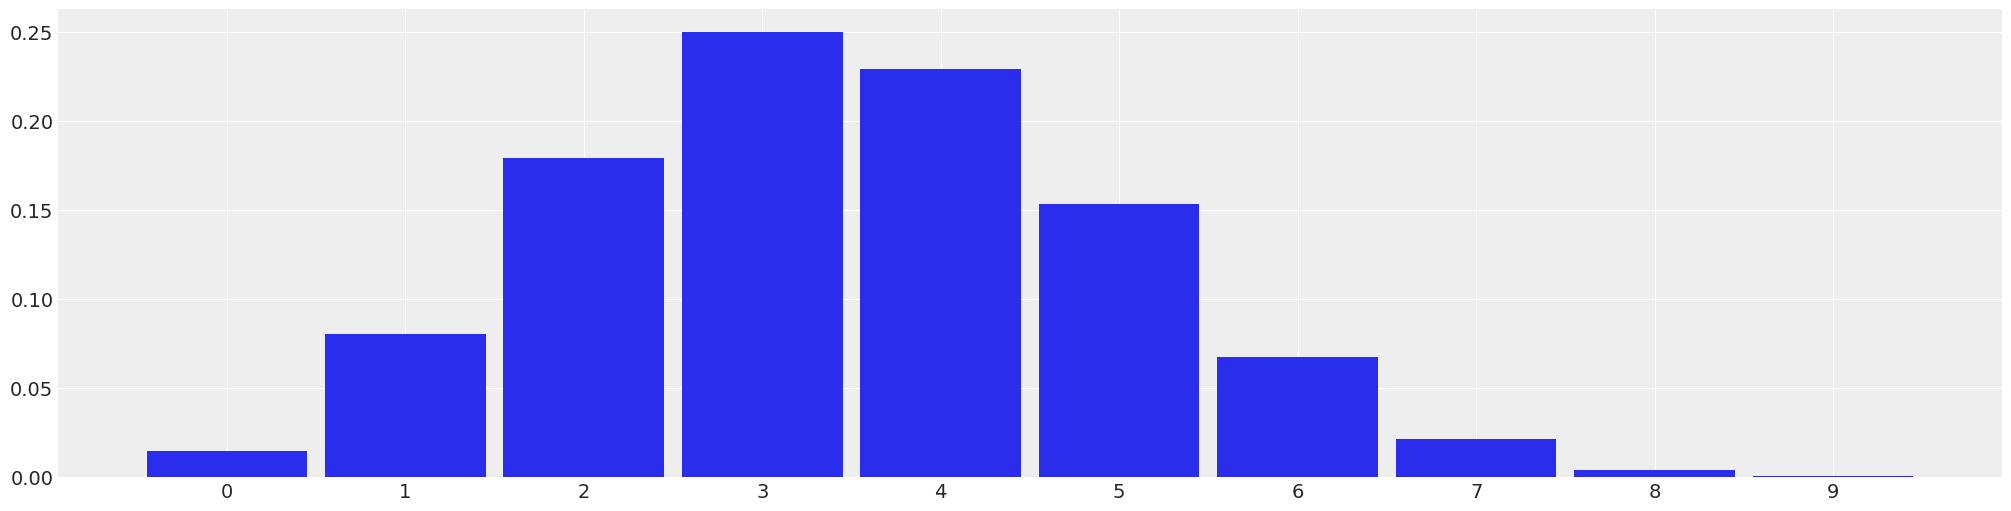

In [ ]:
az.style.use("arviz-darkgrid")

axes = az.plot_dist(pos_data, kind="hist", figsize=(20, 5))

plt.show()

In [ ]:
m=BinoBeta_PPD_data['m']
a=BinoBeta_PPD_data['a']
b=BinoBeta_PPD_data['b']
n=BinoBeta_PPD_data['n']
x=BinoBeta_PPD_data['y']
a1=x+a
a2=n-x+b

In [ ]:
BB_GEN=scipy.stats.betabinom.rvs(m,a1,a2,loc=0,size=3000)
np.mean(BB_GEN)

3.4433333333333334

<function matplotlib.pyplot.show>

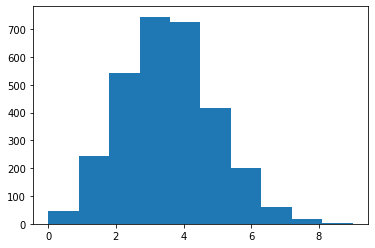

In [ ]:
plt.hist(BB_GEN)
plt.show

In [ ]:
BinoBeta_PPD_op=az.from_pystan(posterior=BinoBeta_PPD_fit)
BinoBeta_PPD_op

Inference data with groups:
	> posterior
	> sample_stats

In [ ]:
az.style.use("arviz-darkgrid")

axes = az.plot_forest([BinoBeta_PPD_op], model_names=["BinoBeta_PPD_fit"],var_names=['PosPred'],combined=True,
                      quartiles=False,hdi_prob=0.95,figsize=(20, 3),markersize=15)
axes[0].set_title("Estimated proportion")

plt.show()

#<center><font color="darkblue">  Predictive Models</center>

In Stan, Generated quantities block can be used to test a fitted model (through the model block)

The customary steps of data partition (training / test)  and assoicated metrics of performance of a model would be followed in a similar way to other preditive models

In [ ]:
path = "/content/drive/MyDrive/Data Sets/BirthWt.csv"
brtwt_da = pd.read_csv(path)

In [ ]:
#Data Partition
train_brtwt=brtwt_da.sample(frac = 0.9)
test_brtwt=brtwt_da.loc[brtwt_da.index.difference(train_brtwt.index), ]

In [ ]:
#Data for the model
y_train=train_brtwt.bweight
y_test=test_brtwt.bweight

x_train=train_brtwt['gestwks']
x_test=test_brtwt['gestwks']

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# <font color="darkyellow"> Linear Model with Non-Informative Priors

In [ ]:
brtwt_LPM_code1 = """
data {
    int<lower=0> N_train;
    int<lower = 1> N_test;
    real a_i;
    real<lower=0> b_i;
    real a_p1;
    real<lower=0> b_p1;
    vector[N_train] y;
    vector[N_train] x1;
    vector[N_test] x2;
    real<lower=0> g1;
    real<lower=0> g2;
   }

parameters {
    real b0;
    real b1;
    real<lower=0> tau;
}

transformed parameters {
   real<lower=0> sig;
   sig=sqrt(1/tau);
}

model {
      y ~ normal(b0+b1*x1, sig);
      b0 ~ normal(a_i, b_i);
      b1 ~ normal(a_p1, b_p1);
      tau ~ gamma(g1,g2);
}
generated quantities{
   vector[N_test] y_pred;
  for(i in 1:N_test) {
    y_pred[i] = normal_rng(b0+b1*x2[i],sig);
  }
}
"""
# posterior
posterior1_Pred = pystan.StanModel(model_code=brtwt_LPM_code1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_102174337d1e10f391e66ce1bceaf205 NOW.


In [ ]:
# Data for MCMC
brtwt_LPM_data1 = {
             'N_train': len(train_brtwt),
             'x1': x_train-np.mean(x_train),
             'x2': x_test-np.mean(x_test),
             'y': y_train,
             'N_test': len(test_brtwt),
             'a_i':0,
             'b_i':10,
             'a_p1':0,
             'b_p1':10,
             'g1':3,
             'g2':1,}
print(brtwt_LPM_data1)

In [ ]:
brtwt_LPM_model1= posterior1_Pred.sampling(data=brtwt_LPM_data1,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
az.plot_trace(brtwt_LPM_model1,var_names=['b0','b1','sig'], compact=False,legend=True,figsize=(20,15))
plt.show()

In [ ]:
post_Prd_draws_A=brtwt_LPM_model1.extract()

In [ ]:
pd.DataFrame(post_Prd_draws_A['y_pred'])

In [ ]:
Pred_mod1=az.summary(brtwt_LPM_model1,var_names=['y_pred'],round_to=3,hdi_prob=0.95)
Pred_mod1

In [ ]:
err1=np.array(Pred_mod1['mean'])-np.array(y_test)

In [ ]:
err1

In [ ]:
MSE1=np.sqrt(sum(err1**2)/len(y_test))
MSE1

3147.1326261781983

In [ ]:
plt.figure(figsize=(25,10))
plt.hist(brtwt_da['bweight'])

plt.show()

# <font color="darkorange"> Cauchy prior

Discussions are useful to construct more reasonable priors

[Gelman 2006](https://projecteuclid.org/journals/bayesian-analysis/volume-1/issue-3/Prior-distributions-for-variance-parameters-in-hierarchical-models-comment-on/10.1214/06-BA117A.full)
[More on Gelman 2006](https://scholar.google.com/scholar?cluster=17174635251182296809&hl=en&as_sdt=0,5)

[Ghosh 2018](https://projecteuclid.org/journals/bayesian-analysis/volume-13/issue-2/On-the-Use-of-Cauchy-Prior-Distributions-for-Bayesian-Logistic/10.1214/17-BA1051.full)


[Info_Bweight](https://www.ncbi.nlm.nih.gov/books/NBK32815/#:~:text=With%20respect%20to%20temporal%20changes,weeks%2C%20gains%20approximately%202.5%20kg.)

In [ ]:
brtwt_LPM_code2 = """
data {
    int<lower=0> N_train;
    int<lower = 1> N_test;
    real a_i;
    real<lower=0> b_i;
    real a_p1;
    real<lower=0> b_p1;
    vector[N_train] y;
    vector[N_train] x1;
    vector[N_test] x2;
    real<lower=0> g1;
    real<lower=0> g2;
   }

parameters {
    real b0;
    real b1;
    real<lower=0> tau;
}

transformed parameters {
   real<lower=0> sig;
   sig=sqrt(1/tau);
}

model {
      y ~ normal(b0+b1*x1, sig);
      b0 ~ normal(a_i, b_i);
      b1 ~ normal(a_p1, b_p1);
      tau ~ cauchy(g1,g2);
}
generated quantities{
   vector[N_test] y_pred;
  for(i in 1:N_test) {
    y_pred[i] = normal_rng(b0+b1*x2[i],sig);
  }
}
"""
# posterior
posterior2_Pred = pystan.StanModel(model_code=brtwt_LPM_code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bbea8fa9ccdc7d81c540fef0489ee4dc NOW.


In [ ]:
brtwt_LPM_data2 = {
             'N_train': len(train_brtwt),
             'x1': x_train-np.mean(x_train),
             'x2': x_test-np.mean(x_test),
             'y': y_train,
             'N_test': len(test_brtwt),
             'a_i':3000,
             'b_i':10,
             'a_p1':300,
             'b_p1':10,
             'g1':0,
             'g2':5,}
print(brtwt_LPM_data2)

{'N_train': 577, 'x1': 559    -0.410173
291   -10.790174
539     0.879828
54     -0.690175
395     1.449828
         ...    
0      -0.960172
628    -0.670175
494    -5.660173
153     1.019828
50      0.449828
Name: gestwks, Length: 577, dtype: float64, 'x2': 1      0.579220
31     0.439217
37    -1.710781
38     2.229218
39     1.659218
         ...   
604    2.229218
623    0.719219
627    0.089218
630   -0.910782
637   -0.130783
Name: gestwks, Length: 64, dtype: float64, 'y': 559    3400
291     980
539    3380
54     3500
395    3750
       ... 
0      2410
628    3180
494    1820
153    3600
50     3280
Name: bweight, Length: 577, dtype: int64, 'N_test': 64, 'a_i': 3000, 'b_i': 10, 'a_p1': 300, 'b_p1': 10, 'g1': 0, 'g2': 5}


In [ ]:
brtwt_LPM_model2= posterior2_Pred.sampling(data=brtwt_LPM_data2,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=1,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

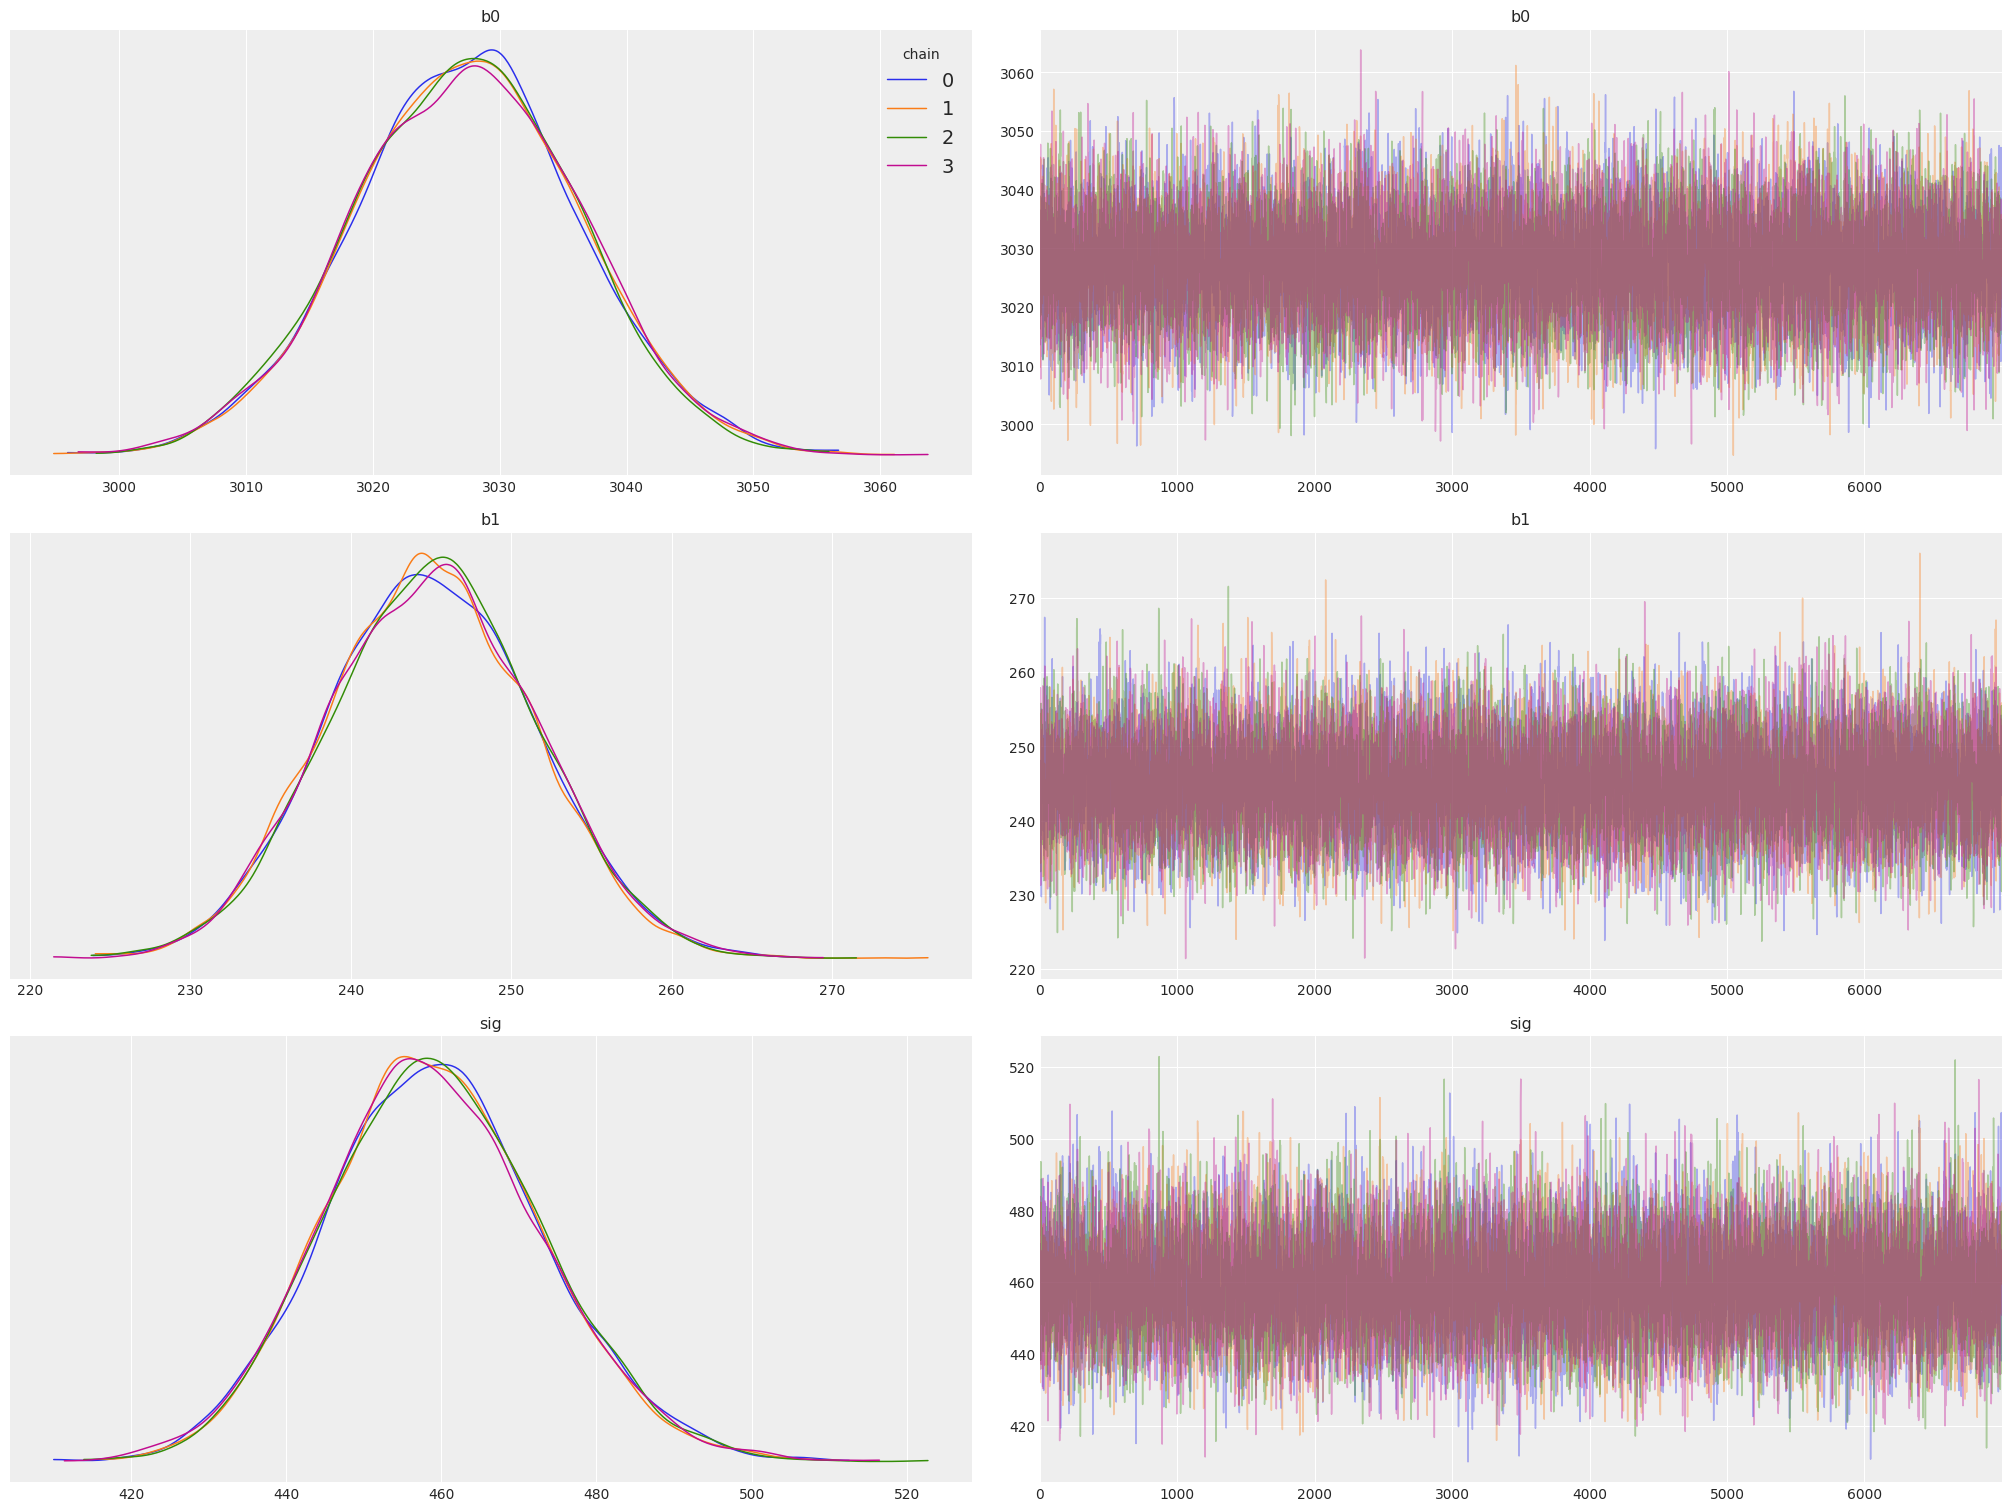

In [ ]:
az.plot_trace(brtwt_LPM_model2,var_names=['b0','b1','sig'], compact=False,legend=True,figsize=(20,15))
plt.show()

In [ ]:
post_Prd_draws_A=brtwt_LPM_model2.extract()

In [ ]:
pd.DataFrame(post_Prd_draws_A['y_pred'])

In [ ]:
Pred_mod2=az.summary(brtwt_LPM_model2,var_names=['y_pred'],round_to=3,hdi_prob=0.95)
Pred_mod2

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_pred[0],3171.228,460.554,2279.117,4083.322,2.714,1.919,28799.568,28011.432,1.0
y_pred[1],3137.193,460.035,2225.419,4028.653,2.788,1.979,27244.910,27277.740,1.0
y_pred[2],2612.127,459.128,1692.374,3503.697,2.739,1.937,28097.627,28226.138,1.0
y_pred[3],3573.661,456.880,2671.305,4465.274,2.728,1.932,28074.468,27678.833,1.0
y_pred[4],3431.448,462.340,2540.371,4356.621,2.808,1.993,27105.342,27840.181,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[59],3574.837,461.322,2663.795,4460.745,2.752,1.948,28101.215,27720.893,1.0
y_pred[60],3207.083,459.164,2304.191,4114.286,2.723,1.926,28445.609,26721.491,1.0
y_pred[61],3047.486,462.590,2131.878,3946.232,2.805,1.983,27205.498,27873.707,1.0
y_pred[62],2807.325,462.547,1888.926,3705.438,2.759,1.951,28101.934,27947.656,1.0


In [ ]:
err2=np.array(Pred_mod2['mean'])-np.array(y_test)

In [ ]:
MSE2=np.sqrt(sum(err2**2)/len(y_test))
MSE2

474.747515513164

#<font color="darkblue">Classification - Binary Logistic Regression

In [ ]:
path = "/content/drive/MyDrive/Data Sets/TelcoCustomerChurn.csv"
data = pd.read_csv(path)
data=data.assign(churn_n=lambda x:x['Churn'].apply(lambda y: 1 if y=="Yes" else 0))


In [ ]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn_n'],
      dtype='object')

In [ ]:
train=data.sample(frac = 0.9)
test=data.loc[data.index.difference(train.index), ]

In [ ]:
y_trainx=train.churn_n
y_testx=test.churn_n
#x_trainx=train.drop('Churn',axis=1)
#x_testx=test.drop('Churn',axis=1)
x_trainx=np.transpose(np.asmatrix(train['tenure']))
x_testx=np.transpose(np.asmatrix(test['tenure']))

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_trainx.shape, x_testx.shape, y_trainx.shape, y_testx.shape)

In [ ]:
custchur_data = {
             'N_train': len(x_trainx),
             'N_test': len(x_testx),
             'a0':0,
             'b0':10,
             'a1':0,
             'b1':0.03,
             'K':1,
             'x_train':x_trainx,
             'y_train':y_trainx,
             'x_test':x_testx,
             'y_test':y_testx
            }
print(custchur_data)

In [ ]:
custchur_code = """
data {
    real a0;
    real<lower=0> b0;
    real a1;
    real<lower=0> b1;

    int<lower=0> K;

    int<lower = 1> N_train;
    matrix[N_train,K] x_train;
    int<lower = 0, upper = 1> y_train[N_train];

    int<lower = 1> N_test;
    matrix[N_test,K] x_test;
}
parameters {
    real alpha;
    vector[K] beta;
}

model {
      y_train ~ bernoulli_logit(alpha + x_train*beta);
      alpha ~ cauchy(a0,b0);
      for(i in 1:K)
        beta[i] ~ student_t(1, a1, b1);

}
generated quantities {
  vector[N_test] y_test;
  for(i in 1:N_test) {
    y_test[i] = inv_logit(alpha + x_test[i]*beta);//bernoulli_rng(inv_logit(alpha + x_test[i]*beta))
  }
}
"""

In [ ]:
# posterior
posterior = pystan.StanModel(model_code=custchur_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3896c257a5426860dd24a16dba0b6fd3 NOW.


In [ ]:
custchur_fit= posterior.sampling(data=custchur_data,
                  iter=10000,
                  chains=4,
                  seed=1,
                  warmup=3000,
                  thin=10,verbose=True,
                  control={"max_treedepth":15,"adapt_delta" : 0.9999})

In [ ]:
print(custchur_fit.stansummary(pars=['alpha','beta'],probs=(0.025, 0.25, 0.5, 0.75, 0.975), digits_summary=4))

Inference for Stan model: anon_model_74590f5f8316855be0b26f0e5a788943.
4 chains, each with iter=10000; warmup=3000; thin=10; 
post-warmup draws per chain=700, total post-warmup draws=2800.

          mean  se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.0218   0.0008 0.0439 -0.063 -0.007 0.0218 0.0512  0.108   2804  1.002
beta[1] -0.038 2.804e-5 0.0015 -0.041 -0.039 -0.038 -0.037 -0.035   2708 1.0017

Samples were drawn using NUTS at Wed Jan 12 01:20:20 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
custchur_fit_op=az.from_pystan(posterior=custchur_fit)
custchur_fit_op

Inference data with groups:
	> posterior
	> sample_stats

In [ ]:
az.plot_trace(custchur_fit,var_names=['alpha','beta'], compact=False,legend=True,figsize=(20,15))
plt.show()

In [ ]:
post_Prd_draws_A=custchur_fit.extract()

In [ ]:
post_Prd_draws_A

In [ ]:
pd.DataFrame(post_Prd_draws_A['y_test'])

In [ ]:
Pred_mod=az.summary(custchur_fit,var_names=['y_test'],round_to=3,hdi_prob=0.95)
Pred_mod

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_test[0],0.283,0.006,0.271,0.296,0.0,0.0,2729.819,2606.665,1.000
y_test[1],0.431,0.009,0.413,0.448,0.0,0.0,2762.454,2723.540,0.999
y_test[2],0.093,0.005,0.083,0.103,0.0,0.0,2835.211,2859.430,0.999
y_test[3],0.145,0.006,0.133,0.156,0.0,0.0,2811.966,2687.627,0.999
y_test[4],0.497,0.011,0.476,0.518,0.0,0.0,2773.820,2674.921,1.000
...,...,...,...,...,...,...,...,...,...
y_test[699],0.340,0.007,0.326,0.354,0.0,0.0,2733.867,2732.964,1.000
y_test[700],0.421,0.009,0.404,0.438,0.0,0.0,2759.572,2765.433,0.999
y_test[701],0.111,0.006,0.100,0.122,0.0,0.0,2828.516,2707.714,0.999
y_test[702],0.073,0.005,0.063,0.082,0.0,0.0,2837.279,2950.296,0.999


In [ ]:
err_LR=np.array(Pred_mod['mean'])-np.array(y_test)

In [ ]:
type(Pred_mod)

pandas.core.frame.DataFrame

In [ ]:
def pred_class (row):
   if row['mean'] >= 0.4 :
      return 1
   return 0

In [ ]:
Pred_mod['pred_cls']=Pred_mod.apply (lambda row: pred_class(row), axis=1)

In [ ]:
Pred_mod

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,pred_cls
y_test[0],0.283,0.006,0.271,0.296,0.0,0.0,2729.819,2606.665,1.000,0
y_test[1],0.431,0.009,0.413,0.448,0.0,0.0,2762.454,2723.540,0.999,1
y_test[2],0.093,0.005,0.083,0.103,0.0,0.0,2835.211,2859.430,0.999,0
y_test[3],0.145,0.006,0.133,0.156,0.0,0.0,2811.966,2687.627,0.999,0
y_test[4],0.497,0.011,0.476,0.518,0.0,0.0,2773.820,2674.921,1.000,1
...,...,...,...,...,...,...,...,...,...,...
y_test[699],0.340,0.007,0.326,0.354,0.0,0.0,2733.867,2732.964,1.000,0
y_test[700],0.421,0.009,0.404,0.438,0.0,0.0,2759.572,2765.433,0.999,1
y_test[701],0.111,0.006,0.100,0.122,0.0,0.0,2828.516,2707.714,0.999,0
y_test[702],0.073,0.005,0.063,0.082,0.0,0.0,2837.279,2950.296,0.999,0
